In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Set seaborn style for better plots
sns.set()

# Download USD/INR historical data from Yahoo Finance, disabling auto adjustment to avoid warnings
data = yf.download("USDINR=X", start="2022-07-12", end="2024-12-30", auto_adjust=False)

# Remove the extra MultiIndex level from columns to simplify column names
data.columns = data.columns.droplevel(1)

# Show the first 5 rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open  Volume
Date                                                                     
2022-07-12  79.477798  79.477798  79.860298  79.388496  79.477798       0
2022-07-13  79.476402  79.476402  80.059502  79.425003  79.476402       0
2022-07-14  79.807503  79.807503  80.218697  79.598099  79.807503       0
2022-07-15  79.878304  79.878304  80.089500  79.708000  79.878304       0
2022-07-18  79.720497  79.720497  80.255997  79.713699  79.720497       0


In [12]:
# Save the cleaned data to a CSV file
data.to_csv("USD_INR_Historical.csv")

# (Optional) Load the saved CSV file
data = pd.read_csv("USD_INR_Historical.csv")

# Convert the 'Date' column to datetime format for plotting and analysis
data['Date'] = pd.to_datetime(data['Date'])


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open  Volume
Date                                                                     
2022-07-12  79.477798  79.477798  79.860298  79.388496  79.477798       0
2022-07-13  79.476402  79.476402  80.059502  79.425003  79.476402       0
2022-07-14  79.807503  79.807503  80.218697  79.598099  79.807503       0
2022-07-15  79.878304  79.878304  80.089500  79.708000  79.878304       0
2022-07-18  79.720497  79.720497  80.255997  79.713699  79.720497       0


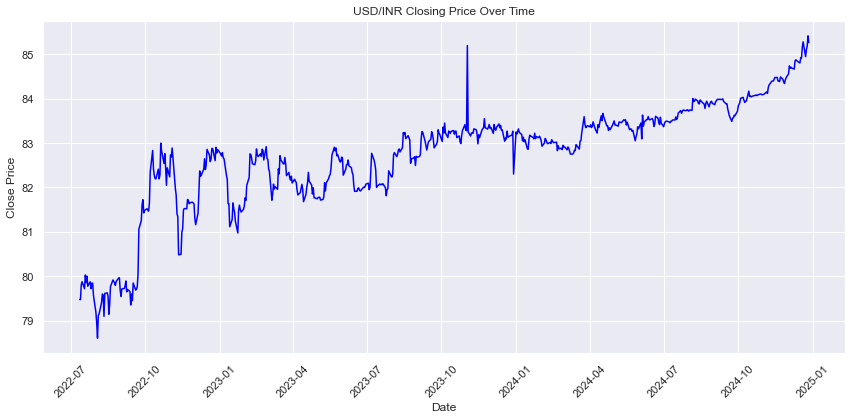

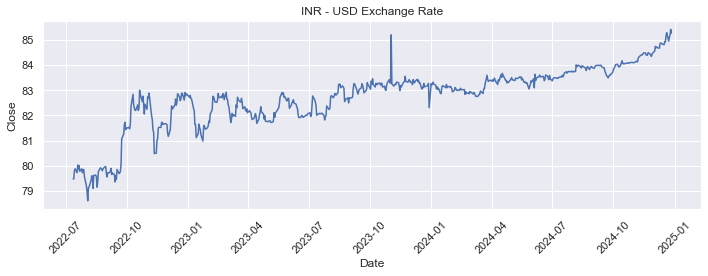

           Adj Close     Close      High       Low      Open  Volume
Adj Close   1.000000  1.000000  0.987486  0.977329  1.000000     NaN
Close       1.000000  1.000000  0.987486  0.977329  1.000000     NaN
High        0.987486  0.987486  1.000000  0.967319  0.987486     NaN
Low         0.977329  0.977329  0.967319  1.000000  0.977329     NaN
Open        1.000000  1.000000  0.987486  0.977329  1.000000     NaN
Volume           NaN       NaN       NaN       NaN       NaN     NaN


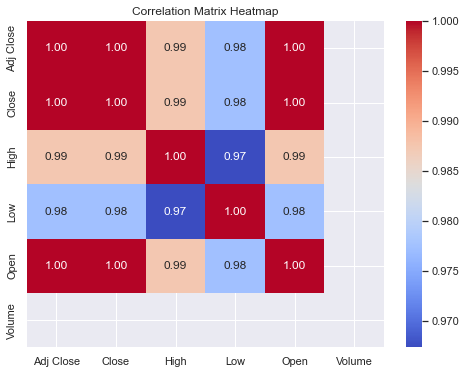

   Predicted Rate
0       84.802002
1       84.056198
2       84.102798
3       83.070602
4       82.999298


In [10]:


# Plot the closing price over time with proper formatting
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], color='blue')
plt.title('USD/INR Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Another simple plot for Close price against Date
plt.figure(figsize=(10, 4))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Date"], data["Close"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Select only numerical columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Print the correlation matrix of numerical columns
print(numeric_data.corr())

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Define features (Open, High, Low prices) and target variable (Close price)
x = data[["Open", "High", "Low"]]
y = data["Close"]

# Split data into training and testing sets (80% train, 20% test)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Regressor model
model = DecisionTreeRegressor()

# Train the model on the training data
model.fit(xtrain, ytrain)

# Predict the Close prices on the test data
ypred = model.predict(xtest)

# Create a DataFrame with the predicted rates and display the first 5 rows
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())
